<a href="https://colab.research.google.com/github/KSrimanNarayana/Linear-Regression/blob/main/Jamboree_Education_BCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Company Context:**

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

**Problem Statement :**

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.


**Column Profiling:**

Serial No. (Unique row ID)

GRE Scores (out of 340)

TOEFL Scores (out of 120)

University Rating (out of 5)

Statement of Purpose and Letter of Recommendation Strength (out of 5)

Undergraduate GPA (out of 10)

Research Experience (either 0 or 1)

Chance of Admit (ranging from 0 to 1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import f

In [ ]:
#@title Loading Dataset
jamboree_df = pd.read_csv('Jamboree_Admission.csv')

In [ ]:
#@title Dataset Shape
print(f"The given dataset have {jamboree_df.shape[0]} rows and {jamboree_df.shape[1]} columns")

The given dataset have 500 rows and 9 columns


In [ ]:
jamboree_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#@title Duplicate Records Check
#Duplicate rows
jamboree_df.duplicated().value_counts()


,count
False,500


Found No Duplicate rows in given dataset.

In [ ]:
#@title Null Check
#Null Check

jamboree_df.isna().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


Found No Null values in each columns. got the clean dataset

In [ ]:
#@title DataSet Info
#Data Types of Dataset

jamboree_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


The given dataset matching respective columns value with corresponding datatype.

The given dataset is consists of **Numerical Data** throughout it, which  are Integers and Decimal values

In [ ]:
#@title Data Sanity Check
#Data value/Data Sanity check

for col in jamboree_df.columns:
  print(f"Unique values in column {col}:")
  print(jamboree_df[col].unique())
  print("---"*25)

Unique values in column Serial No.:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 23

Found No abnormal values(Unusual values) present in dataset.

In [ ]:
#@title Statistical Summary
#Quantitative Statistical Measures - count, mean, mode, madian, range, standard deviation, quantitles
jamboree_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


**Quantitative Statistical Measures:**

GRE Score:

In **given 500 sample of learners data**, we found more than **50% of learners have scored 316+**, and minimum score of 290 and maximum of 340(full score).

**25% of learners,had  GRE scores are between 290 and 308**.  
**75% of learners are scored under 325**,

**25% of learners had crossed 325+ out of 340**.

TOEFL Score:

**50% of learners have scored 107+**, and **minimum score of 92 and maximum of 120(full score).**

**25% of learners,had  TOEFL scores are between 92 and 103**.

**25% of learners had crossed 112+ out of 120**.

**University Rating:**

**25% of leanrners are aiming for Universites whose rating is 4+.**

**25% of learners are choose for universites which is rated 1-2.**

**SOP & LOR:**

**25%** of learners SOP & LOR are had rating **4+.**

**25%** of learners SOP & LOR ratings are between **1 and 3**.

**CGPA:**

**50%** of learners **CGPA** are more than **8.56**.

**Reaearch Experience:**

**50%** Learners are having any Research experience and **50%** of learners not having any Research experience.


**Chance of Admit:**

**50%** of learners are having morethan **70%** chances of admit into  IVY league college.

**50%** of learners are having chances of admit into  IVY league college are lessthan 70%.









**all calculations are based on the 500 samples of learners data provided.


In [ ]:
#Droping irrelevent features
#droping Serial No.
jamboree_df.drop('Serial No.',axis=1,inplace=True)

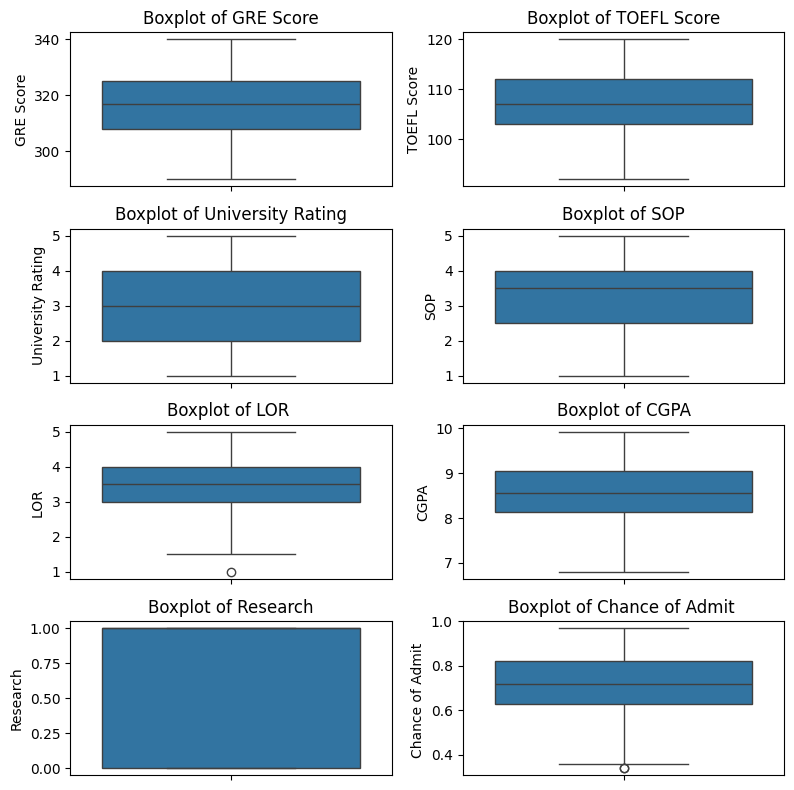

In [ ]:
#@title Outlier Detection
#outliers check


# Create a 4x2 subplot grid
fig, axes = plt.subplots(4, 2, figsize=(8, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over columns and plot Boxplot
for i, col in enumerate(jamboree_df.columns):
    sns.boxplot(jamboree_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Found outliers in LOR and Chance of Admit

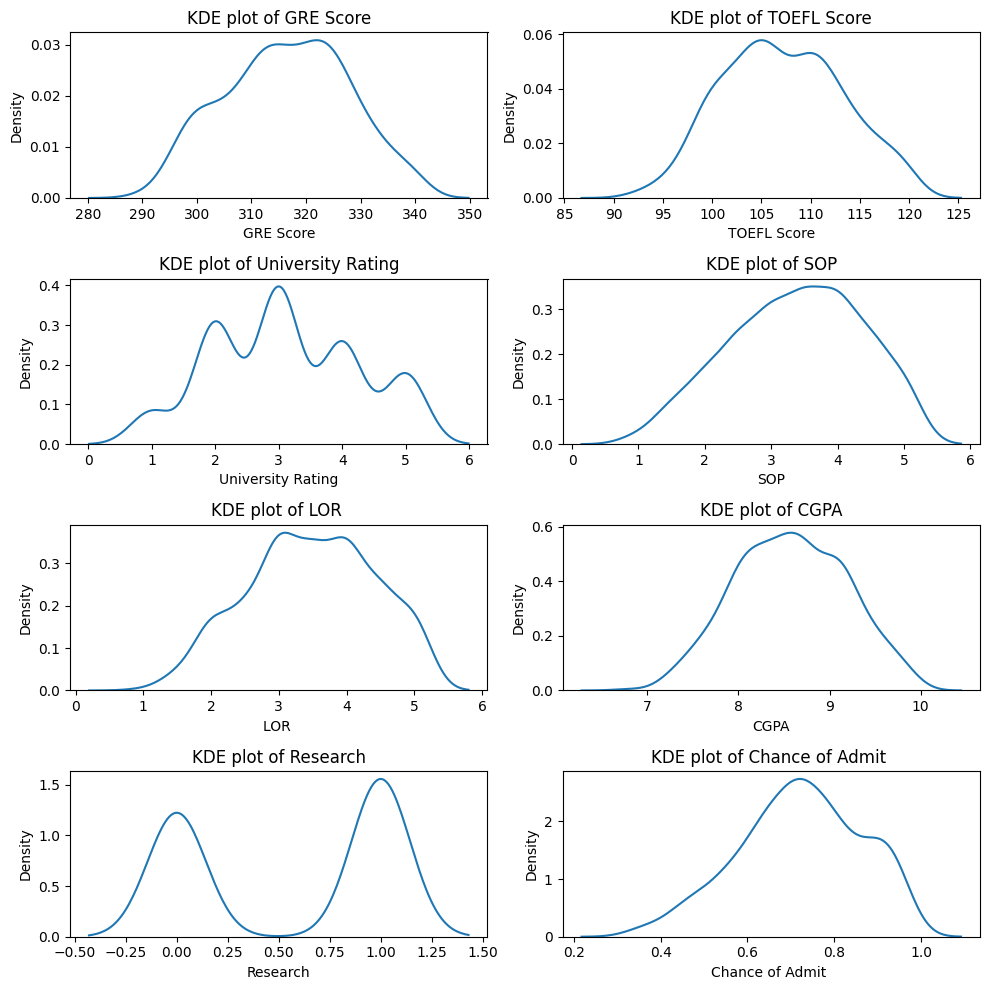

In [ ]:
#kde plots

# Create a 4x2 subplot grid
fig, axes = plt.subplots(4, 2, figsize=(10, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over columns and plot KDEplot
for i, col in enumerate(jamboree_df.columns):
    sns.kdeplot(jamboree_df[col], ax=axes[i])
    axes[i].set_title(f'KDE plot of {col}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
jamboree_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

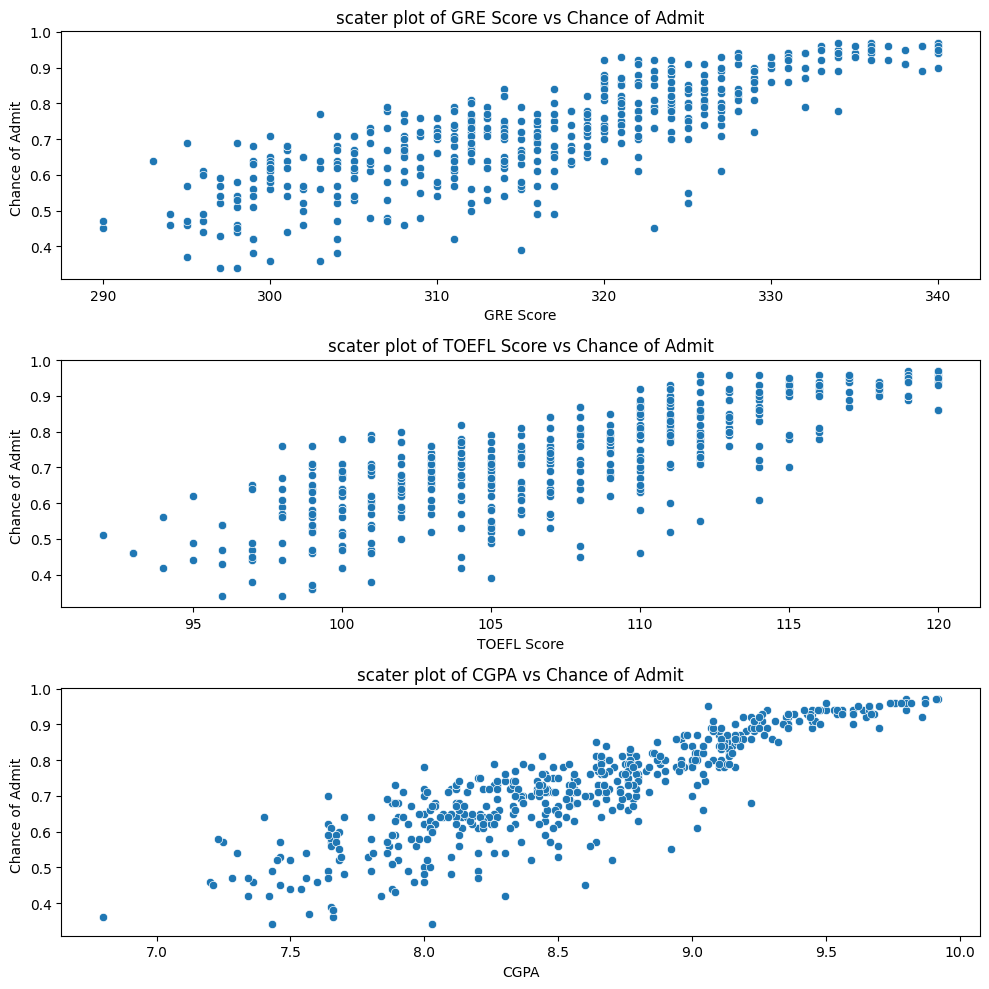

In [ ]:
#BI-varaite Analysis

# Create a 4x2 subplot grid
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over columns and plot scatterplot
for i, col in enumerate(['GRE Score', 'TOEFL Score','CGPA',]):
    sns.scatterplot(data=jamboree_df,y='Chance of Admit ',x=col, ax=axes[i])
    axes[i].set_title(f'scater plot of {col} vs Chance of Admit')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

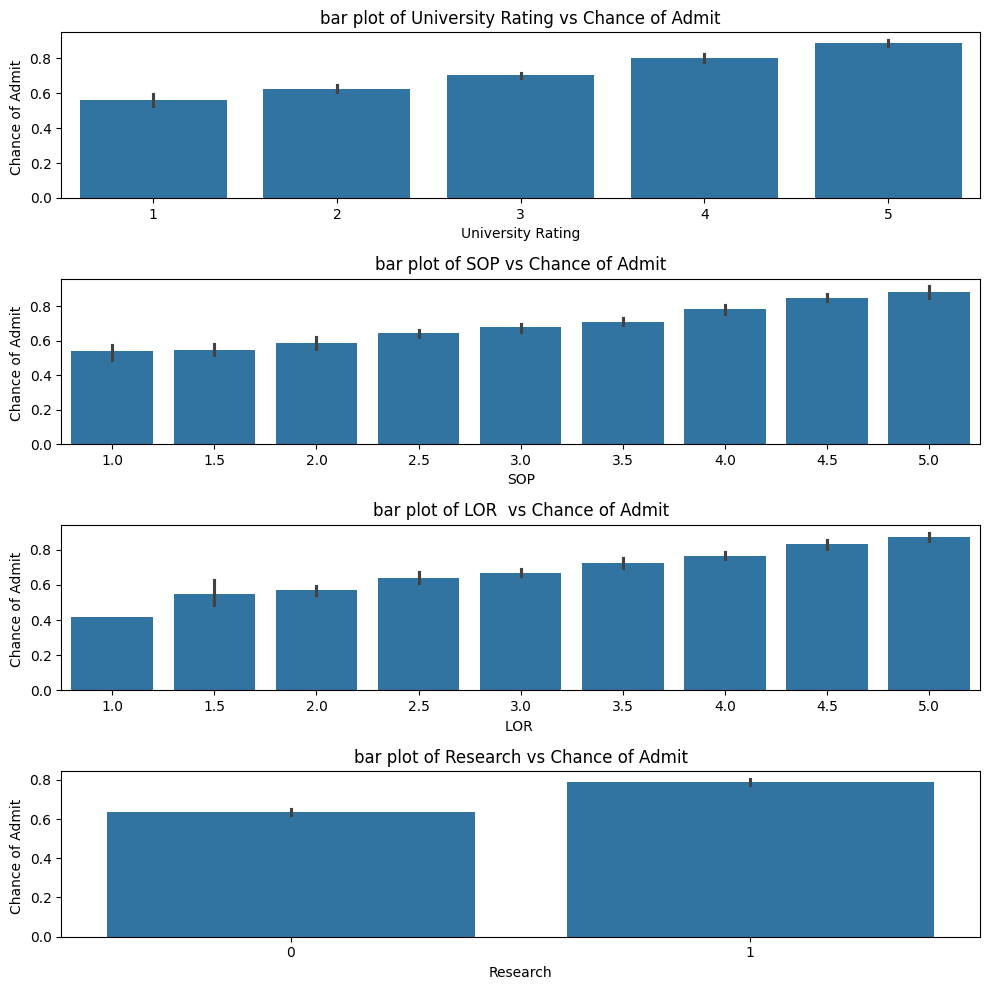

In [ ]:
#BI-varaite Analysis

# Create a 4x1 subplot grid
fig, axes = plt.subplots(4, 1, figsize=(10, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over columns and plot barplot
for i, col in enumerate(['University Rating', 'SOP', 'LOR ','Research']):
    sns.barplot(data=jamboree_df,y='Chance of Admit ',x=col, ax=axes[i])
    axes[i].set_title(f'bar plot of {col} vs Chance of Admit')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


As per Observations, All columns in dataset are exihibiting the linear relation with chance of Admit(target variable).

<Axes: >

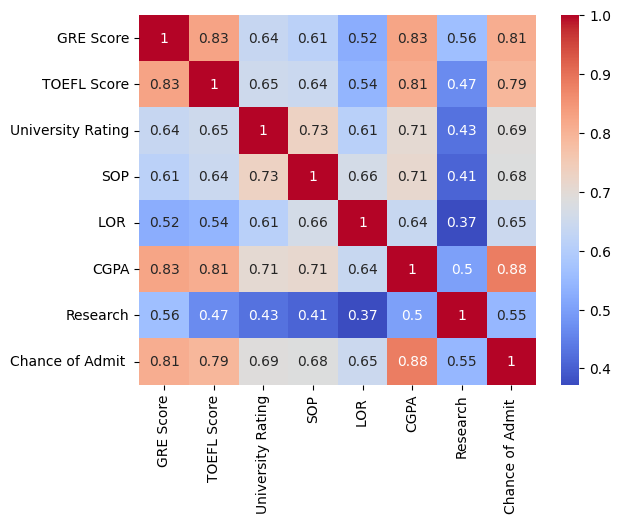

In [ ]:
#@title Correlation Heatmap
#Correlation check

sns.heatmap(jamboree_df.corr(),annot=True,cmap='coolwarm')

We can Observe that **GRE, TOEFL, CGPA scores** are **strongly correlated with Chance of Admit**.

In [ ]:
# Calculate Pearson correlation coefficient and p-value


# Assuming you have a DataFrame named 'df' with columns 'GRE_Score' and 'Chance_of_Admit'
for col in jamboree_df.columns[:-1]:
  print(f"Pearson Correlation Coefficient for {col}:")
  df = jamboree_df
  correlation_coefficient, p_value = pearsonr(df[col], df['Chance of Admit '])

  # Print results
  print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
  print(f'p-value: {p_value}')

  # Decision based on p-value
  alpha = 0.05
  if p_value < alpha:
      print(f"Reject the null hypothesis: There is a significant impact of {col} on Chance of Admit.")
  else:
      print(f"Fail to reject the null hypothesis: There is no significant impact of {col} on Chance of Admit.")
  print("---"*25)


Pearson Correlation Coefficient for GRE Score:
Pearson Correlation Coefficient: 0.8103506354632598
p-value: 1.0884036862479007e-117
Reject the null hypothesis: There is a significant impact of GRE Score on Chance of Admit.
---------------------------------------------------------------------------
Pearson Correlation Coefficient for TOEFL Score:
Pearson Correlation Coefficient: 0.792227614305083
p-value: 6.729926762330067e-109
Reject the null hypothesis: There is a significant impact of TOEFL Score on Chance of Admit.
---------------------------------------------------------------------------
Pearson Correlation Coefficient for University Rating:
Pearson Correlation Coefficient: 0.6901323687886889
p-value: 5.866255627652171e-72
Reject the null hypothesis: There is a significant impact of University Rating on Chance of Admit.
---------------------------------------------------------------------------
Pearson Correlation Coefficient for SOP:
Pearson Correlation Coefficient: 0.68413652413

Pearson Correlation Coefficient

Range: -1 to 1

  1: Perfect positive linear relationship.

  -1: Perfect negative linear relationship.

  0: No linear relationship.

Strength:

  0.0 to 0.3: Weak

  0.3 to 0.6: Moderate

  0.6 to 0.9: Strong

  0.9 to 1.0: Very strong

p-value:

Significance Level (α): Commonly set at 0.05.

p-value < α: Reject the null hypothesis (significant correlation).

p-value ≥ α: Fail to reject the null hypothesis (no significant correlation).

Summary:

All variables (GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, and Research) have a significant impact on the Chance of Admit, as indicated by their strong correlation coefficients and very small p-values.

 The strength of the correlation varies, with CGPA showing the strongest correlation and Research showing the weakest among the listed variables.

In [ ]:
#@title  Train Test Split
# Split the data into training and testing sets
X= jamboree_df.loc[:,jamboree_df.columns[:-1]]
y= jamboree_df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(400, 7) (100, 7) (400,) (100,)


In [ ]:
#@title Feature Scaling

# Feature Scaling :: MinMaxScaling

scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

print(X_train_scale.shape,X_test_scale.shape,y_train.shape,y_test.shape)


(400, 7) (100, 7) (400,) (100,)


In [ ]:
#@title Linear Regression
model = LinearRegression()
model.fit(X_train_scale , y_train)

output_test = model.predict(X_test_scale)
residual =  y_test - output_test

print('R2 score for test:', np.round(r2_score(y_test, output_test),2))
print('MSE for test:', np.round(mean_squared_error(y_test, output_test),3))


output = model.predict(X_train_scale)
print('MSE for train:',np.round(mean_squared_error(y_train, output),3))
print("MAE for test:",np.round(mean_absolute_error(y_test, output_test),3))
print("MAE for train:",np.round(mean_absolute_error(y_train, output),3))
print("RMSE for test:",np.round(mean_squared_error(y_test, output_test,squared=False),3))
print("RMSE for train:",np.round(mean_squared_error(y_train, output,squared=False),3))

R2 score for test: 0.82
MSE for test: 0.004
MSE for train: 0.004
MAE for test: 0.043
MAE for train: 0.043
RMSE for test: 0.061
RMSE for train: 0.059


In [ ]:
#@title Adjusted R2 score
def adj_r(r_sq,n,d):
  adj_r1 = (1 - ((1-r_sq)*(n-1))/(n-d-1))
  return adj_r1

r2 =r2_score(y_test,output_test)
print("Adjacanet R2Score : ", np.round(adj_r(r2,y.shape[0],X.shape[-1]),2))

Adjacanet R2Score :  0.82


In [ ]:
#@title Lasso Regression
#Lasso Regression

from sklearn.linear_model import Lasso
alpha =[0.0003,0.001,0.002,0.003,0.01,0.3,0.6,0.9,1.3,10,100,1000]
test_lasso_performance=[]
train_lasso_performance=[]
for i in alpha:
  lasso_model = Lasso(alpha=i)
  lasso_model.fit(X_train_scale, y_train)
  lasso_output_test = lasso_model.predict(X_test_scale)
  # lasso_residual =  y_test - lasso_output_test
  r2_score_test = r2_score(y_test, lasso_output_test)
  r2_score_train = r2_score(y_train, lasso_model.predict(X_train_scale))
  test_lasso_performance.append(r2_score_test)
  train_lasso_performance.append(r2_score_train)
  print("Alpha : ",i)
  print('R2 score for test:', np.round(r2_score(y_test, lasso_output_test),2))
  print('MSE for test:', np.round(mean_squared_error(y_test, lasso_output_test),3))
  lasso_output_train = lasso_model.predict(X_train_scale)
  print('MSE for train:',np.round(mean_squared_error(y_train, lasso_output_train),3))
  print("MAE for test:",np.round(mean_absolute_error(y_test, lasso_output_test),3))
  print("MAE for train:",np.round(mean_absolute_error(y_train, lasso_output_train),3))
  print("----"*25)





Alpha :  0.0003
R2 score for test: 0.82
MSE for test: 0.004
MSE for train: 0.004
MAE for test: 0.043
MAE for train: 0.042
----------------------------------------------------------------------------------------------------
Alpha :  0.001
R2 score for test: 0.82
MSE for test: 0.004
MSE for train: 0.004
MAE for test: 0.042
MAE for train: 0.042
----------------------------------------------------------------------------------------------------
Alpha :  0.002
R2 score for test: 0.82
MSE for test: 0.004
MSE for train: 0.004
MAE for test: 0.042
MAE for train: 0.043
----------------------------------------------------------------------------------------------------
Alpha :  0.003
R2 score for test: 0.81
MSE for test: 0.004
MSE for train: 0.004
MAE for test: 0.044
MAE for train: 0.045
----------------------------------------------------------------------------------------------------
Alpha :  0.01
R2 score for test: 0.69
MSE for test: 0.006
MSE for train: 0.006
MAE for test: 0.062
MAE for trai

In [ ]:
#@title Ridge Regression

from sklearn.linear_model import Ridge


alpha =[0.0003,0.001,0.002,0.003,0.01,0.3,0.6,0.9,1.3,10,100,1000]
test_ridge_performance=[]
train_ridge_performance=[]
for i in alpha:
  ridge_model = Ridge(alpha=i)
  ridge_model.fit(X_train_scale, y_train)
  ridge_output_test = ridge_model.predict(X_test_scale)

  r2_score_test = r2_score(y_test, ridge_output_test)
  r2_score_train = r2_score(y_train, ridge_model.predict(X_train_scale))
  test_ridge_performance.append(r2_score_test)
  train_ridge_performance.append(r2_score_train)
  print("Alpha : ",i)
  print('R2 score for test:', np.round(r2_score(y_test, ridge_output_test),2))
  print('MSE for test:', np.round(mean_squared_error(y_test, ridge_output_test),3))
  ridge_output_train = ridge_model.predict(X_train_scale)
  print('MSE for train:',np.round(mean_squared_error(y_train, ridge_output_train),3))
  print("MAE for test:",np.round(mean_absolute_error(y_test, ridge_output_test),3))
  print("MAE for train:",np.round(mean_absolute_error(y_train, ridge_output_train),3))
  print("----"*25)





Alpha :  0.0003
R2 score for test: 0.82
MSE for test: 0.004
MSE for train: 0.004
MAE for test: 0.043
MAE for train: 0.043
----------------------------------------------------------------------------------------------------
Alpha :  0.001
R2 score for test: 0.82
MSE for test: 0.004
MSE for train: 0.004
MAE for test: 0.043
MAE for train: 0.043
----------------------------------------------------------------------------------------------------
Alpha :  0.002
R2 score for test: 0.82
MSE for test: 0.004
MSE for train: 0.004
MAE for test: 0.043
MAE for train: 0.043
----------------------------------------------------------------------------------------------------
Alpha :  0.003
R2 score for test: 0.82
MSE for test: 0.004
MSE for train: 0.004
MAE for test: 0.043
MAE for train: 0.043
----------------------------------------------------------------------------------------------------
Alpha :  0.01
R2 score for test: 0.82
MSE for test: 0.004
MSE for train: 0.004
MAE for test: 0.043
MAE for trai

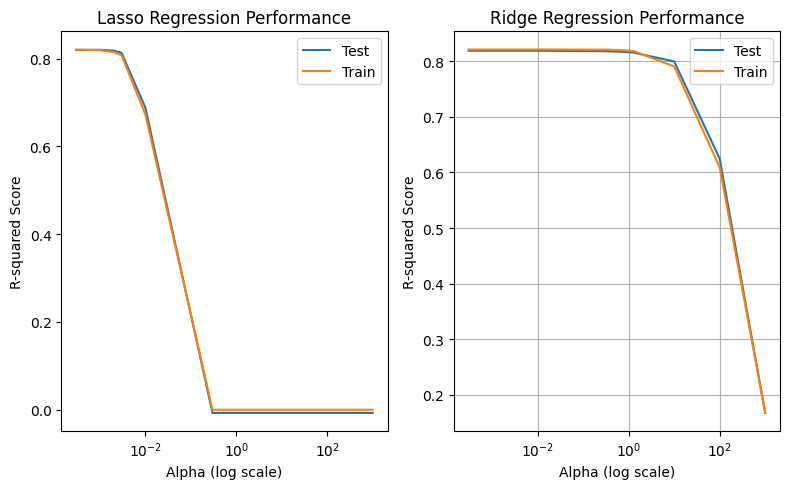

In [ ]:
#@title Hyper Parameter tunning
# Plot the performance against alpha

# Create subplots for Ridge and Lasso performance
fig, axs = plt.subplots(1, 2, figsize=(8, 5))

# Lasso Performance
axs[0].plot(alpha, test_lasso_performance, label='Test')
axs[0].plot(alpha, train_lasso_performance, label='Train')
axs[0].set_xscale('log')
axs[0].set_xlabel('Alpha (log scale)')
axs[0].set_ylabel('R-squared Score')
axs[0].set_title('Lasso Regression Performance')
axs[0].legend()

# Ridge Performance
axs[1].plot(alpha, test_ridge_performance, label='Test')
axs[1].plot(alpha, train_ridge_performance, label='Train')
axs[1].set_xscale('log')
axs[1].set_xlabel('Alpha (log scale)')
axs[1].set_ylabel('R-squared Score')
axs[1].set_title('Ridge Regression Performance')
axs[1].legend()
plt.tight_layout()
plt.grid(True)
plt.show()


We can observe that in Lasso regression when alpha between 0.0001 and 0.001 we found best training performance and testing performance.

Ridge Regression also gives same performance as Lasso which inturn gives same result as Linear Regression.

###ElasticNetRegularized Linear Regression

In [ ]:
alpha=[0.04,0.08,0.14,0.1,0.3,0.6]
l1_ratio=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
performance_elasticnet=[]
for i in alpha:
  for j in l1_ratio:
    ElasticNet_model = ElasticNet(alpha=0.001, l1_ratio=0.5)
    ElasticNet_model.fit(X_train_scale, y_train)
    ElasticNet_output_test = ElasticNet_model.predict(X_test_scale)
    r2 = np.round(r2_score(y_test, ElasticNet_output_test),2)
    performance_elasticnet.append(r2)
    print("Alpha : ",i)
    print("L1 Ratio : ",j)
    print('R2 score for test:', r2)
    print("---"*20)

Alpha :  0.04
L1 Ratio :  0.1
R2 score for test: 0.82
------------------------------------------------------------
Alpha :  0.04
L1 Ratio :  0.2
R2 score for test: 0.82
------------------------------------------------------------
Alpha :  0.04
L1 Ratio :  0.3
R2 score for test: 0.82
------------------------------------------------------------
Alpha :  0.04
L1 Ratio :  0.4
R2 score for test: 0.82
------------------------------------------------------------
Alpha :  0.04
L1 Ratio :  0.5
R2 score for test: 0.82
------------------------------------------------------------
Alpha :  0.04
L1 Ratio :  0.6
R2 score for test: 0.82
------------------------------------------------------------
Alpha :  0.04
L1 Ratio :  0.7
R2 score for test: 0.82
------------------------------------------------------------
Alpha :  0.04
L1 Ratio :  0.8
R2 score for test: 0.82
------------------------------------------------------------
Alpha :  0.04
L1 Ratio :  0.9
R2 score for test: 0.82
--------------------------

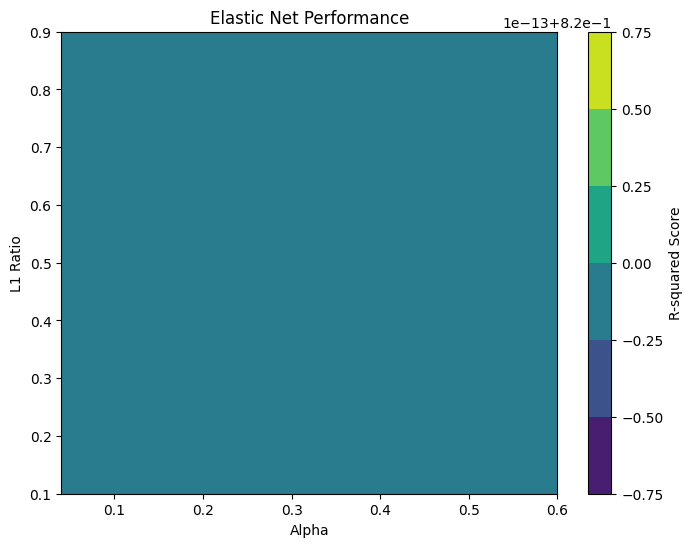

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create a meshgrid of alpha and l1_ratio values
alpha_grid, l1_ratio_grid = np.meshgrid(alpha, l1_ratio)

# Reshape the performance_elasticnet list to match the grid shape
performance_array = np.array(performance_elasticnet).reshape(len(alpha), len(l1_ratio)).T

# Create a contour plot
contour = ax.contourf(alpha_grid, l1_ratio_grid, performance_array, cmap='viridis')

# Add a colorbar
cbar = fig.colorbar(contour)
cbar.ax.set_ylabel('R-squared Score')

# Set axis labels and title
ax.set_xlabel('Alpha')
ax.set_ylabel('L1 Ratio')
ax.set_title('Elastic Net Performance')

# Display the plot
plt.show()


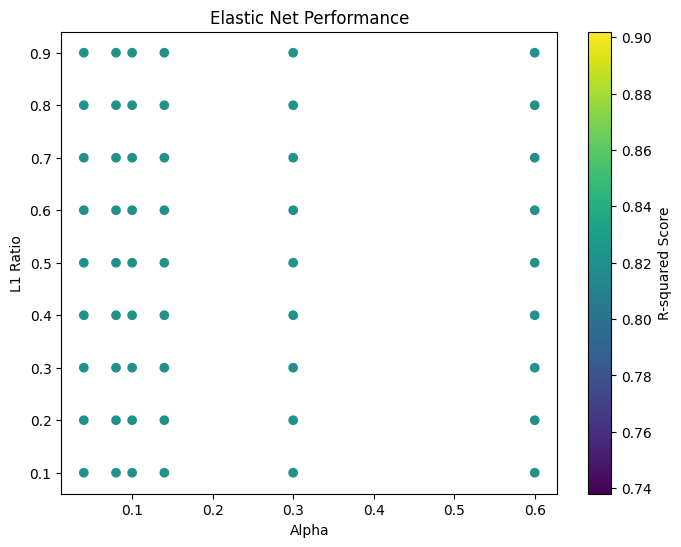

In [ ]:
#@title Results of Hyperparameter tuning of ElasticNet Linear Regression
# Create a DataFrame from the lists
data = {'alpha': [], 'l1_ratio': [], 'performance': []}
for i, a in enumerate(alpha):
  for j, l in enumerate(l1_ratio):
    data['alpha'].append(a)
    data['l1_ratio'].append(l)
    data['performance'].append(performance_elasticnet[i * len(l1_ratio) + j])

df = pd.DataFrame(data)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['alpha'], df['l1_ratio'], c=df['performance'], cmap='viridis')
plt.xlabel('Alpha')
plt.ylabel('L1 Ratio')
plt.title('Elastic Net Performance')
plt.colorbar(label='R-squared Score')
plt.show()

We are getting a **Performance of 82% in case of Elastic Net Regression**.

We saw the **performance of Elastic net linear regression for different hyperparameter combination values are same**.

We can observe that the performance is independent of l1ratio and alpha (i.e independent of hyper parameters)

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Wed, 17 Jul 2024   Prob (F-statistic):          3.41e-142
Time:                        12:59:43   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3556      0.010     36.366      0.0

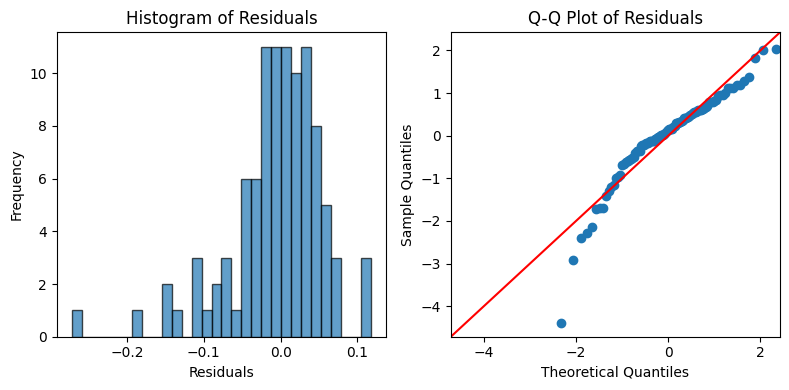

Shapiro-Wilk Test: Statistic=0.9178698658943176, p-value=1.0869382094824687e-05
Kolmogorov-Smirnov Test: Statistic=0.13651428305276808, p-value=0.043597701991339395


In [ ]:
#@title OLS Stats Model
data = jamboree_df

# Define the independent variables and the target variable
independent_vars = data.columns[:-1]  # All columns except the last one
target_var = 'Chance of Admit '

# Prepare the data for regression
X = data[independent_vars]
y = data[target_var]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add intercept
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Fit the regression model
olsmodel = sm.OLS(y_train, X_train_scaled).fit()

# Print the summary of the regression model
print(olsmodel.summary())

# Make predictions on the test set
output = olsmodel.predict(X_test_scaled)
print('MSE for test:', np.round(mean_squared_error(y_test, output), 3))

# Obtain the residuals
residuals = y_test - output  # Calculate residuals

# Create subplots for the histogram and Q-Q plot
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot the histogram of residuals
axs[0].hist(residuals, bins=30, edgecolor='k', alpha=0.7)
axs[0].set_title('Histogram of Residuals')
axs[0].set_xlabel('Residuals')
axs[0].set_ylabel('Frequency')

# Create a Q-Q plot
sm.qqplot(residuals, line='45', fit=True, ax=axs[1])
axs[1].set_title('Q-Q Plot of Residuals')

# Show the plots
plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# Perform Kolmogorov-Smirnov test
ks_test = stats.kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))
print(f'Kolmogorov-Smirnov Test: Statistic={ks_test.statistic}, p-value={ks_test.pvalue}')


Shapiro-Wilk Test:

Statistic: 0.918

p-value: 1.09×10^−5


A p-value less than 0.05 suggests that the residuals are not normally distributed. This indicates a rejection of the null hypothesis of normality.

Kolmogorov-Smirnov Test:

Statistic: 0.137

p-value: 0.044

Similarly, the p-value here is also less than 0.05, providing evidence against the null hypothesis of normality. This suggests that the residuals deviate from a normal distribution.

In [ ]:
#@title Model Interpretability | Parameter - Weigths values
#model interpretation

#model coefficient values and intercept value
print("Model Intercept Values (w0) : ",np.round(model.intercept_,3))
print("Model Coefficient Values (w's) for Features : ")
for i in zip(X.columns,np.round(model.coef_,3)):
  print(i[0]," : ",i[1])

Model Intercept Values (w0) :  0.356
Model Coefficient Values (w's) for Features : 
GRE Score  :  0.122
TOEFL Score  :  0.084
University Rating  :  0.01
SOP  :  0.007
LOR   :  0.06
CGPA  :  0.351
Research  :  0.024


Found best paramter values for Model via Gradient Decent Algorithm.

Got an impressive  Performance of **82%**, with least error on Training and Testing Data.

Based on the paramter(model coefficient) values we found that



1.   **All independent features are having positive coefficient values**
    which indicates for every unit change in respective feild,
    while keeping other feild values as constant  will result in overall chance of admit value increased by coefficient times

    example :

    If GRE score value increases while keeping rest of the values as constant then chance of admit into IVY college increases.

2.  .Feature Importance: better the coefficient value indicates importance of the feature in finding pattern.

    here in ourcase we observe **CGPA, GRE Score, TOEFL Score are  top 3 priority features** as thier coefficient magnitude is higher then rest.
    **SOP rating is least priority feature.**




##Assumptions of linear regression

In [ ]:
#@title Multicollinearity  Check
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = pd.DataFrame(X_train_scale, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,39.76
0,GRE Score,31.20
1,TOEFL Score,26.76
3,SOP,18.57
4,LOR,11.01
2,University Rating,10.95
6,Research,3.36


High VIF values suggest multicollinearity. This does not affect prediction accuracy but can make the model coefficients unstable and harder to interpret.

In [ ]:
#@title mean of residuals

print("mean of residuals : ", np.round(np.mean(residual),2))

mean of residuals :  -0.01


Assumption of mean of residual close to zero holds true

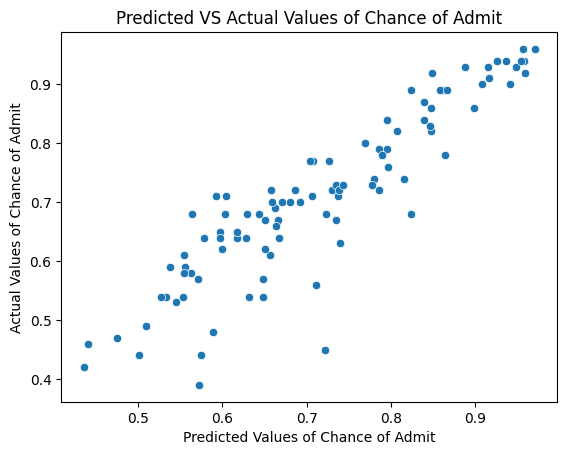

In [ ]:
#Predicted VS Actual Values
sns.scatterplot(y=y_test,x=output_test)
plt.title('Predicted VS Actual Values of Chance of Admit')
plt.xlabel('Predicted Values of Chance of Admit')
plt.ylabel('Actual Values of Chance of Admit')
plt.show()

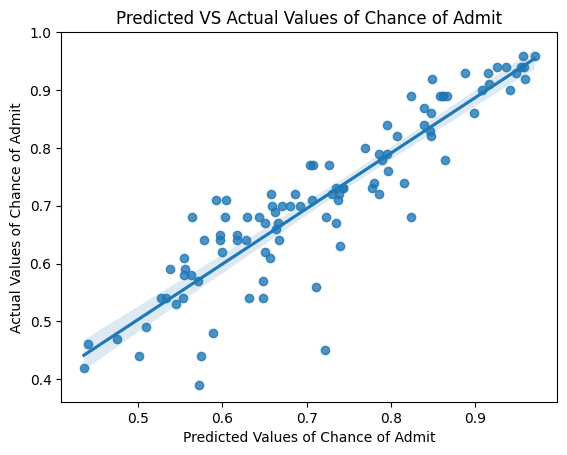

In [ ]:
#@title Regplot between Actual and Predicted value of Chance of Admit

#Predicted VS Actual Values
sns.regplot(y=y_test,x=output_test)
plt.title('Predicted VS Actual Values of Chance of Admit')
plt.xlabel('Predicted Values of Chance of Admit')
plt.ylabel('Actual Values of Chance of Admit')
plt.show()


We can observe 80% of predicted data fits well with actual values but 20% of  prediction values are deviated from actual values .

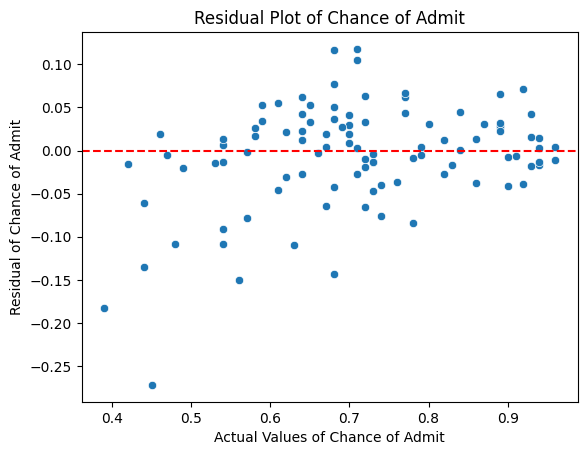

In [ ]:
#@title Residual Plot between Predicted values of Chance of Admit

sns.scatterplot(x=y_test,y=residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot of Chance of Admit')
plt.ylabel('Residual of Chance of Admit')
plt.xlabel('Actual Values of Chance of Admit')
plt.show();

**No Apparent Pattern**:

The residuals appear to be randomly scattered around the horizontal axis (red dashed line at 0). This suggests that the model does not exhibit obvious patterns of systematic errors, indicating that it might be well-fitted.

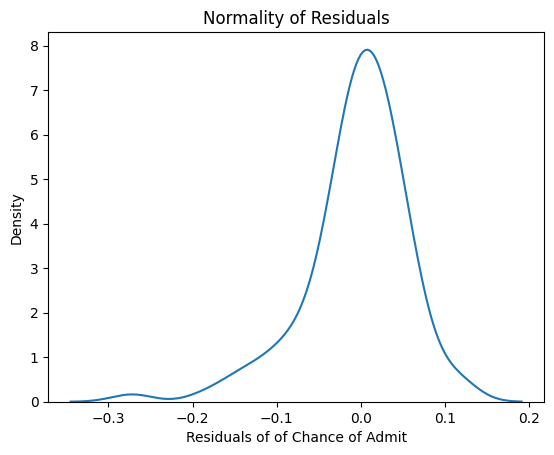

In [ ]:
#normality of Residuals
sns.kdeplot(residual)
plt.title('Normality of Residuals')
plt.xlabel('Residuals of of Chance of Admit')
plt.show()

**Residuals are Normal**

The Distribution of Residuals fairly mimics Normal distribution. but it looks like thier is tail on left side seems a chance of pressence of outlier.

In [ ]:
#@title Test for Homoscedasticity | Goldfeld-Quandt test
#Test for Homoscedasticity
data = jamboree_df

# Define the independent variables and the target variable
independent_vars = jamboree_df.columns[:-1]
target_var = 'Chance of Admit '
for col in jamboree_df.columns[:-1]:
# Sort the data by one of the independent variables (choose one that you suspect might cause heteroscedasticity)
  data = data.sort_values(by=col)
  print(f'sort by {col}')
  # Split the data into two groups (excluding central 20% of the data)
  n = len(data)
  split_index = int(n * 0.4)
  group1 = data.iloc[:split_index]
  group2 = data.iloc[split_index + split_index//2:]

  # Prepare the data for regression
  X1 = sm.add_constant(group1[independent_vars])
  y1 = group1[target_var]
  X2 = sm.add_constant(group2[independent_vars])
  y2 = group2[target_var]

  # Fit the regression models
  model1 = sm.OLS(y1, X1).fit()
  model2 = sm.OLS(y2, X2).fit()

  # Calculate the sum of squared residuals
  SSR1 = np.sum(model1.resid ** 2)
  SSR2 = np.sum(model2.resid ** 2)

  # Calculate the test statistic
  n1 = len(group1)
  n2 = len(group2)
  k = len(independent_vars) + 1  # number of parameters including the intercept
  GQ = (SSR2 / (n2 - k)) / (SSR1 / (n1 - k))

  # Calculate the p-value
  dfn = n2 - k  # degrees of freedom for the numerator
  dfd = n1 - k  # degrees of freedom for the denominator
  p_value = 1 - f.cdf(GQ, dfn, dfd)

  # Print the results
  print(f'GQ Test Statistic: {GQ}')
  print(f'p-value: {p_value}')
  print('No strong evidence of heteroscedasticity (presence of homoscedasticity is validated)' if p_value > 0.05 else 'Strong evidence of heteroscedasticity')
  print("---"*25)


sort by GRE Score
GQ Test Statistic: 0.4828058546171946
p-value: 0.9999996888491792
No strong evidence of heteroscedasticity (presence of homoscedasticity is validated)
---------------------------------------------------------------------------
sort by TOEFL Score
GQ Test Statistic: 0.4380482896342581
p-value: 0.9999999911593015
No strong evidence of heteroscedasticity (presence of homoscedasticity is validated)
---------------------------------------------------------------------------
sort by University Rating
GQ Test Statistic: 0.33275496707261626
p-value: 0.9999999999999473
No strong evidence of heteroscedasticity (presence of homoscedasticity is validated)
---------------------------------------------------------------------------
sort by SOP
GQ Test Statistic: 0.441785909152332
p-value: 0.9999999877522835
No strong evidence of heteroscedasticity (presence of homoscedasticity is validated)
---------------------------------------------------------------------------
sort by LOR 
GQ 

##Recommendation

**Potential business benefits:**

1.Users can estimate their chance of Admit into IVY Colleges.

2.Users can identify bottle/Area of Improvement, focus on  where to concentrate to enchance the chance of admit into IVY colleges.

3.Advertise / recommend the respective course for the respective student in order to boost thier chances of admit into IVY colleges.

